## Data PreProcessing

In [47]:
import pandas as pd                                           # including library
df = pd.read_csv("weather_AUS.csv")                            # importing dataset

In [48]:
df.head()                            # printing first 5 rows of dataset

,Date,Location,MinTemp,Temprature,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [49]:
df.shape                            # printing size of dataset

(145460, 23)

In [50]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'Temprature', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [51]:
df = df.drop(['Date', 'Location'], axis = 1)

In [52]:
cat = df.select_dtypes(include = 'object')

In [53]:
from sklearn.preprocessing import LabelEncoder
lE = LabelEncoder()
for col in cat:
    df[col] = lE.fit_transform(df[col])

In [54]:
df.head()

,MinTemp,Temprature,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [55]:
df.isna().sum()                            # printing null values in each column

MinTemp           1485
Temprature        1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [56]:
df[['MinTemp', 'Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']] = df[['MinTemp', 'Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']].interpolate()

In [57]:
df.isna().sum()                                                    # checking the null values in dataset

MinTemp             0
Temprature       1261
Rainfall            0
Evaporation      6049
Sunshine         6049
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            2
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

In [58]:
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Temprature'] = df['Temprature'].fillna(df['Temprature'].mean())

In [59]:
df.isnull().sum()                                                           # again checking null values either removed or not

MinTemp          0
Temprature       0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [60]:
X = df.drop(['RainToday'], axis = 1)
Y = df['RainToday']

In [61]:
from sklearn.preprocessing import StandardScaler
sS = StandardScaler()
X_scaled = sS.fit_transform(X)

In [62]:
df = X_scaled
df = pd.DataFrame(X_scaled, columns = X.columns)
df = pd.concat([df, Y.reset_index(drop = True)], axis = 1)

In [63]:
corr = df.corr()                                                             # correlation finding of dataset

<Axes: >

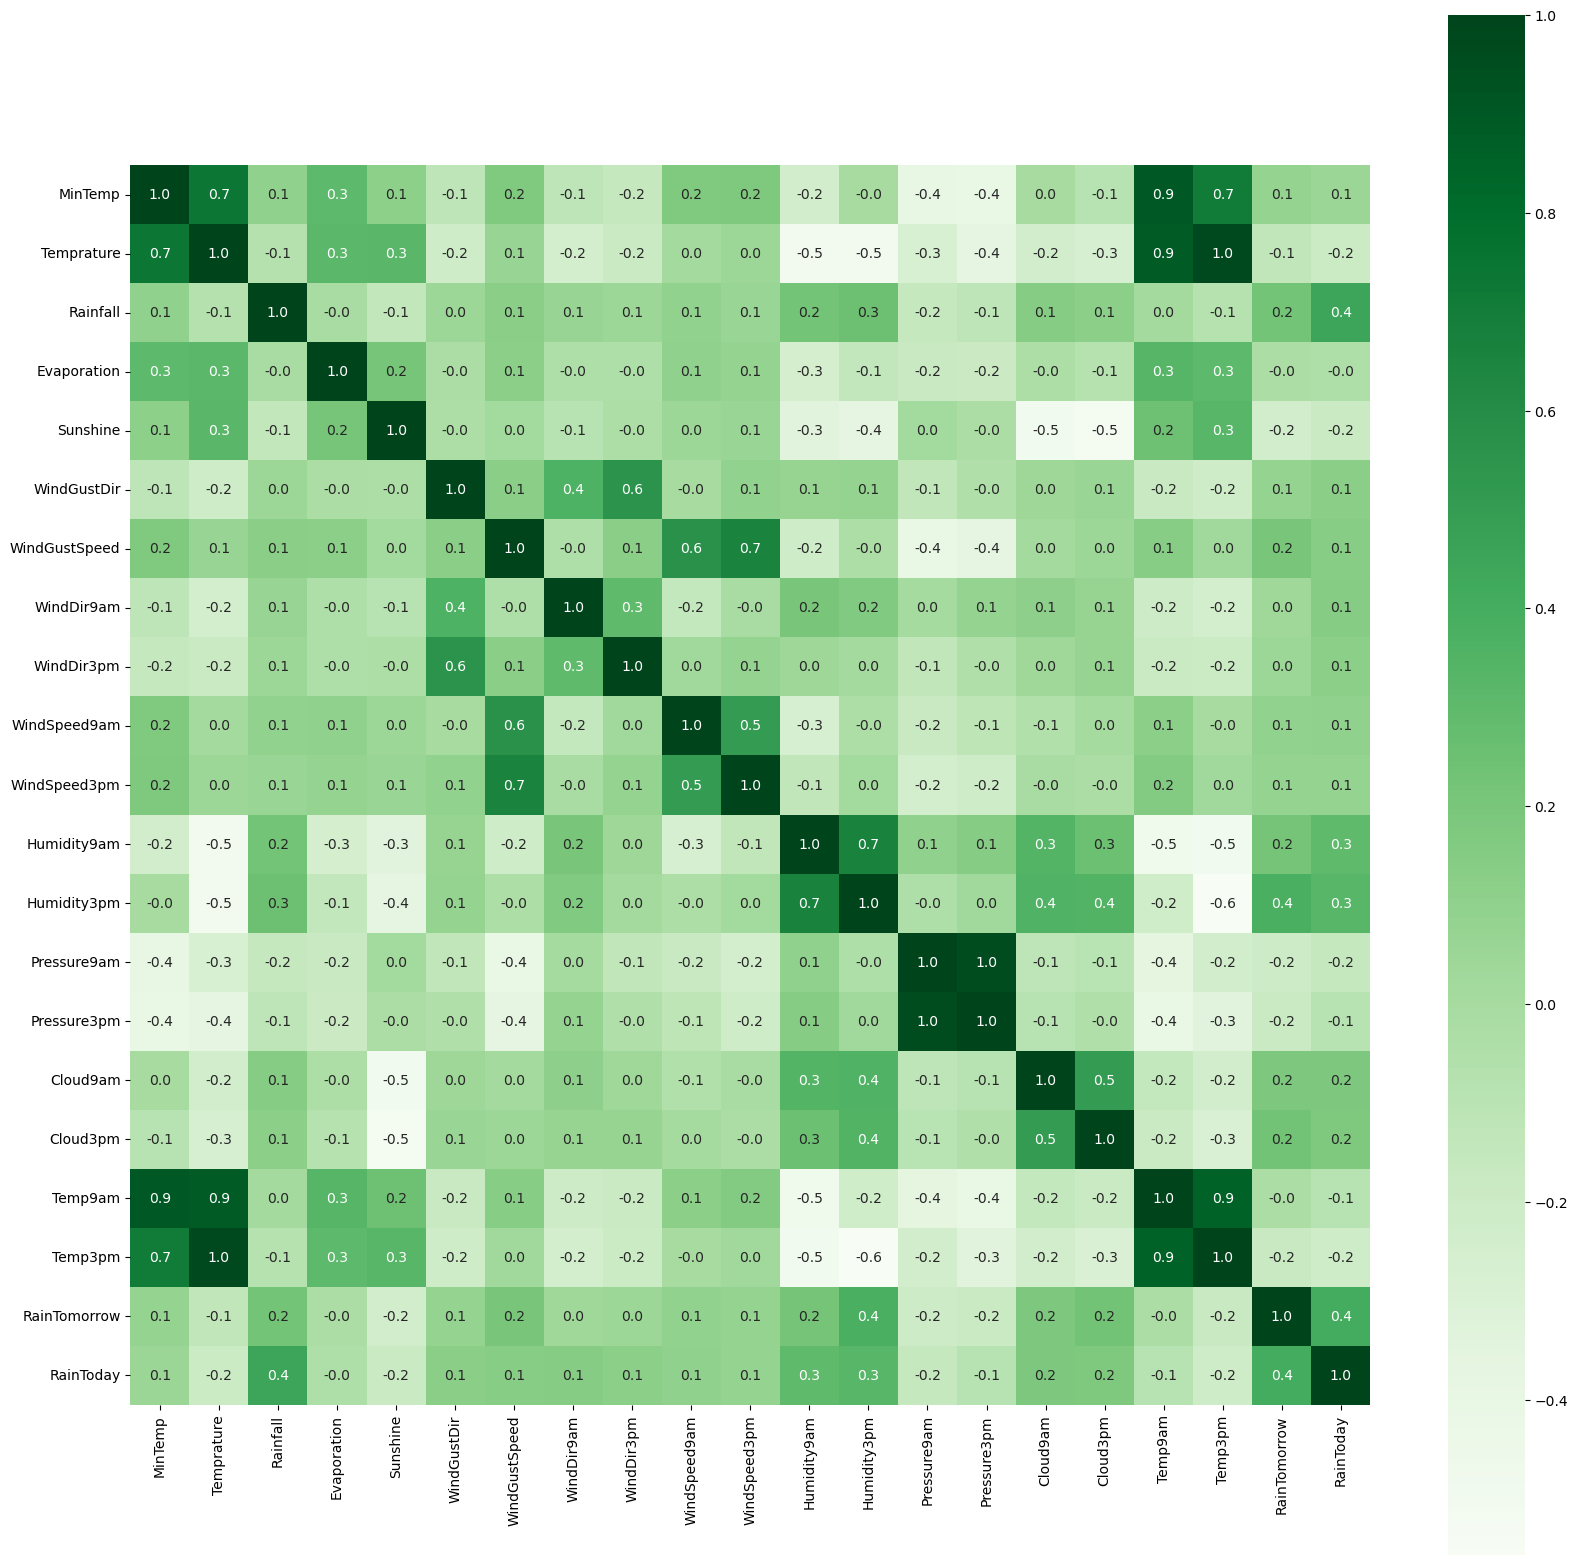

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))                                                             # drawing heatmap
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',                                   
annot=True, annot_kws={'size':10}, cmap='Greens')                            

In [65]:
df.columns                                      # printing columns name to remove according to correlation in heatmap

Index(['MinTemp', 'Temprature', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow', 'RainToday'],
      dtype='object')

In [66]:
df = df.drop(['Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm'], axis = 1)        # removing columns using correlation and heatmap

<Axes: >

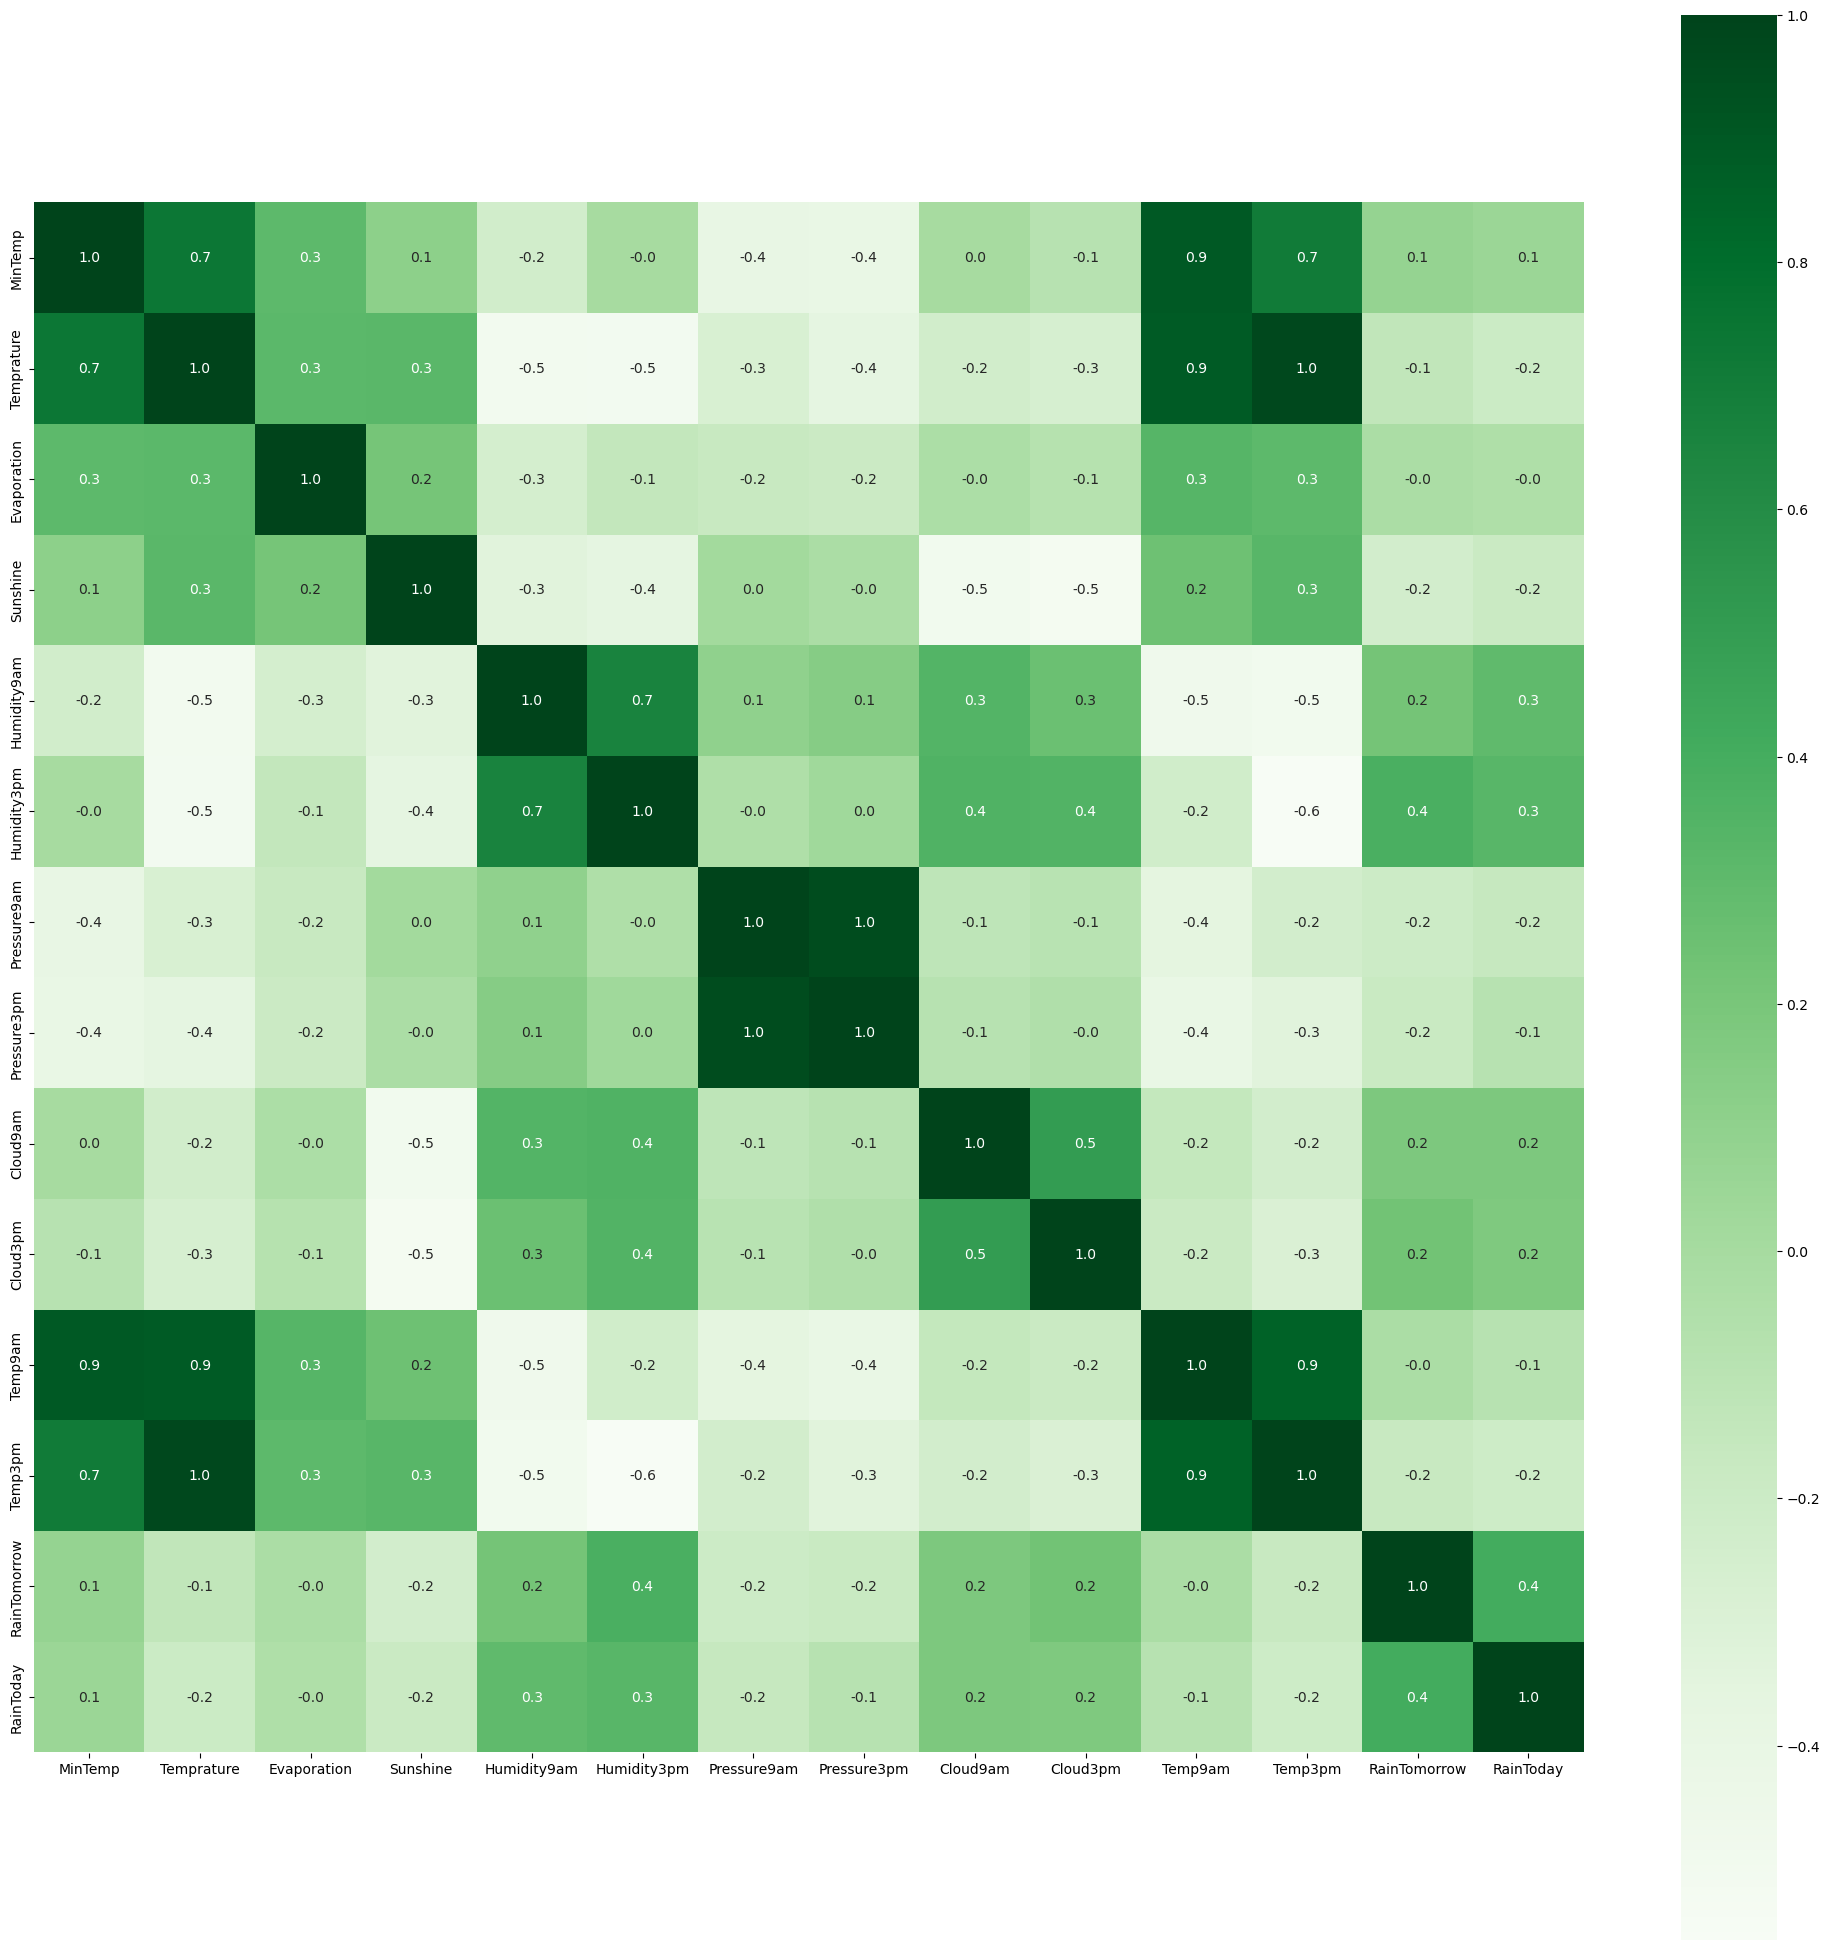

In [67]:
correlation = df.corr()                                                                   # again finding correlation
correlation
plt.figure(figsize = (25, 25))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',
annot=True, annot_kws={'size':10}, cmap='Greens')                                           # again drawing heatmap

In [68]:
df = df.drop(['RainTomorrow', 'Humidity3pm','Evaporation', 'Sunshine', 'MinTemp'], axis = 1)

<Axes: >

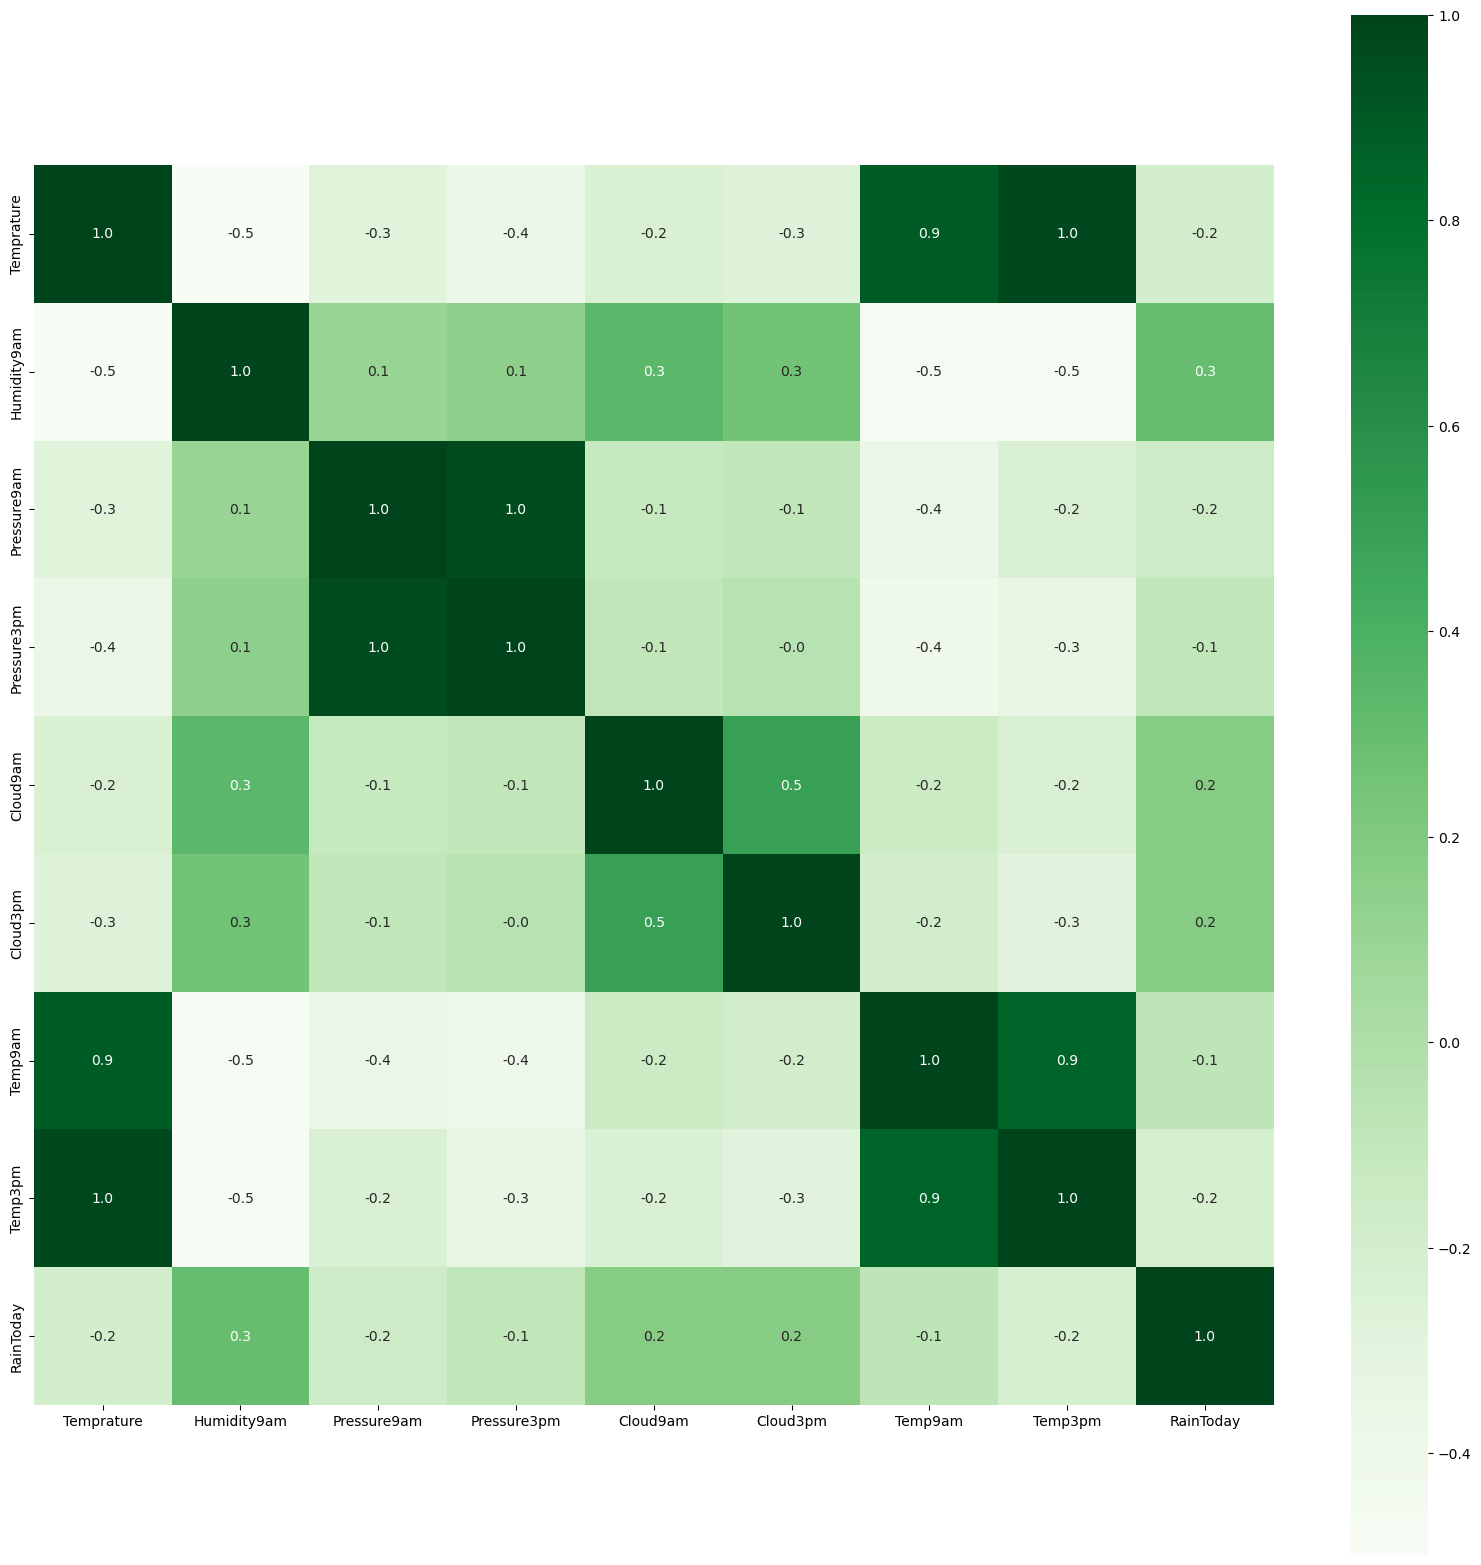

In [69]:
corr = df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',                                   
annot=True, annot_kws={'size':10}, cmap='Greens')

In [70]:
df.shape

(145460, 9)

In [71]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 20)

In [72]:
# X = pca.fit_transform(X_scaled)

## Data Spliting

In [73]:
from sklearn.model_selection import train_test_split                                                   # importing spliting model
X = df.drop(['RainToday'], axis=1)                                                                     # Assigning dataset except target column to predict
Y = df['RainToday']                                                                                    # Assigning target columns to predict values
X_Train , X_Test , Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.2, random_state = 20)           # (here 24% is our test size and randomState)spliting and printing values of X,Y test and train
print("Size of Train X = " , len(X_Train))
print("Size of Train Y = " , len(Y_Train))
print("Size of Test X = " , len(X_Test))
print("Size of Test Y = " , len(Y_Test))

Size of Train X =  116368
Size of Train Y =  116368
Size of Test X =  29092
Size of Test Y =  29092


## Classification

In [74]:
from sklearn.model_selection import train_test_split                                              # importing train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report               # importing confusion matrix and c-report

### Logistic Regression

#### Training

In [75]:
from sklearn.linear_model import LogisticRegression                                      # importing Logistic Regression
Afaq = LogisticRegression()                                                              # creating object

In [76]:
Afaq.fit(X_Train, Y_Train)                                                               # fitting model

LogisticRegression()

In [78]:
training_data_prediction = Afaq.predict(X_Train)                                      # predicting training data
print("Accuracy Score: ",accuracy_score(Y_Train, training_data_prediction))           # printing training accuracy
cm = confusion_matrix(Y_Train, training_data_prediction)
print("Confusion Matrix: \n",cm)
print("Classification Report: \n",classification_report(Y_Train, training_data_prediction))       # printing training classification report

Accuracy Score:  0.8031159769008662
Confusion Matrix: 
 [[82940  5385     2]
 [14924 10516     1]
 [ 2233   366     1]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88     88327
           1       0.65      0.41      0.50     25441
           2       0.25      0.00      0.00      2600

    accuracy                           0.80    116368
   macro avg       0.58      0.45      0.46    116368
weighted avg       0.78      0.80      0.78    116368



#### Testing

In [79]:
Y_pred = Afaq.predict(X_Test)                                      # predicting testing data
print("Accuracy Score: ",accuracy_score(Y_Test, Y_pred))           # printing testing accuracy
cm = confusion_matrix(Y_Test, Y_pred)  
print("Confusion Matrix: \n",cm)
print("Classification Report: \n",classification_report(Y_Test, Y_pred))       # printing training classification report

Accuracy Score:  0.7970576103396123
Confusion Matrix: 
 [[20560  1430     2]
 [ 3810  2628     1]
 [  569    92     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.93      0.88     21992
           1       0.63      0.41      0.50      6439
           2       0.00      0.00      0.00       661

    accuracy                           0.80     29092
   macro avg       0.49      0.45      0.46     29092
weighted avg       0.76      0.80      0.77     29092



### Naive Bayes/Gaussian Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB                      # importing GNB

In [81]:
Afaq = GaussianNB()                                             # Creating Object

#### Training

In [82]:
Afaq.fit(X_Train, Y_Train)                                                               # fitting model

GaussianNB()

In [85]:
training_data_prediction = Afaq.predict(X_Train)                                      # predicting training data
print("Accuracy Score: ",accuracy_score(Y_Train, training_data_prediction))           # printing training accuracy
cm = confusion_matrix(Y_Train, training_data_prediction)
print("Confusion Matrix: \n",cm)
print("Classification Report: \n",classification_report(Y_Train, training_data_prediction))       # printing training classification report

Accuracy Score:  0.7270125807782208
Confusion Matrix: 
 [[71121 17206     0]
 [11961 13480     0]
 [ 1888   712     0]]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82     88327
           1       0.43      0.53      0.47     25441
           2       0.00      0.00      0.00      2600

    accuracy                           0.73    116368
   macro avg       0.42      0.45      0.43    116368
weighted avg       0.73      0.73      0.73    116368



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Testing

In [86]:
Y_pred = Afaq.predict(X_Test)                                      # predicting testing data
print("Accuracy Score: ",accuracy_score(Y_Test, Y_pred))           # printing testing accuracy
cm = confusion_matrix(Y_Test, Y_pred)  
print("Confusion Matrix: \n",cm)
print("Classification Report: \n",classification_report(Y_Test, Y_pred))       # printing training classification report

Accuracy Score:  0.723463495118933
Confusion Matrix: 
 [[17623  4369     0]
 [ 3015  3424     0]
 [  486   175     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82     21992
           1       0.43      0.53      0.48      6439
           2       0.00      0.00      0.00       661

    accuracy                           0.72     29092
   macro avg       0.42      0.44      0.43     29092
weighted avg       0.73      0.72      0.72     29092



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SVM

In [95]:
from sklearn.svm import SVC                                  # importing SVC
Afaq = SVC(kernel = 'linear')                                # creating object

#### Training

In [ ]:
Afaq.fit(X_Train, Y_Train)                                                               # fitting model

In [ ]:
training_data_prediction = Afaq.predict(X_Train)                                      # predicting training data
print("Accuracy Score: ",accuracy_score(Y_Train, training_data_prediction))           # printing training accuracy
cm = confusion_matrix(Y_Train, training_data_prediction)
print(cm)
print("Classification Report: \n",classification_report(Y_Train, training_data_prediction))       # printing training classification report

#### Testing

In [ ]:
Y_pred = Afaq.predict(X_Test)                                      # predicting testing data
print("Accuracy Score: ",accuracy_score(Y_Test, Y_pred))           # printing testing accuracy
cm = confusion_matrix(Y_Test, Y_pred)  
print("Confusion Matrix: \n",cm)
print("Classification Report: \n",classification_report(Y_Test, Y_pred))       # printing training classification report

### Decision Tree 

In [87]:
from sklearn.tree import DecisionTreeClassifier                               # importing DecisionTreeClassifier
Afaq = DecisionTreeClassifier(random_state = 20)                              # creating object

#### Training

In [88]:
Afaq.fit(X_Train, Y_Train)                                                               # fitting model

DecisionTreeClassifier(random_state=20)

In [89]:
training_data_prediction = Afaq.predict(X_Train)                                      # predicting training data
print("Accuracy Score: ",accuracy_score(Y_Train, training_data_prediction))           # printing training accuracy
cm = confusion_matrix(Y_Train, training_data_prediction)
print("Confusion Matrix: \n",cm)
print("Classification Report: \n",classification_report(Y_Train, training_data_prediction))       # printing training classification report

Accuracy Score:  1.0
Confusion Matrix: 
 [[88327     0     0]
 [    0 25441     0]
 [    0     0  2600]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88327
           1       1.00      1.00      1.00     25441
           2       1.00      1.00      1.00      2600

    accuracy                           1.00    116368
   macro avg       1.00      1.00      1.00    116368
weighted avg       1.00      1.00      1.00    116368



#### Testing

In [90]:
Y_pred = Afaq.predict(X_Test)                                      # predicting testing data
print("Accuracy Score: ",accuracy_score(Y_Test, Y_pred))           # printing testing accuracy
cm = confusion_matrix(Y_Test, Y_pred)  
print("Confusion Matrix: \n",cm)
print("Classification Report: \n",classification_report(Y_Test, Y_pred))       # printing training classification report

Accuracy Score:  0.7377285851780558
Confusion Matrix: 
 [[18115  3419   458]
 [ 3105  3189   145]
 [  376   127   158]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     21992
           1       0.47      0.50      0.48      6439
           2       0.21      0.24      0.22       661

    accuracy                           0.74     29092
   macro avg       0.51      0.52      0.51     29092
weighted avg       0.74      0.74      0.74     29092



### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier                            # importing Randomforest
Afaq = RandomForestClassifier(n_estimators = 5, random_state = 20)             # creating object

#### Training

In [92]:
Afaq.fit(X_Train, Y_Train)                                                               # fitting model

RandomForestClassifier(n_estimators=5, random_state=20)

In [93]:
training_data_prediction = Afaq.predict(X_Train)                                      # predicting training data
print("Accuracy Score: ",accuracy_score(Y_Train, training_data_prediction))           # printing training accuracy
cm = confusion_matrix(Y_Train, training_data_prediction)
print(cm)
print("Classification Report: \n",classification_report(Y_Train, training_data_prediction))       # printing training classification report

Accuracy Score:  0.973051010587103
[[87576   748     3]
 [ 1919 23519     3]
 [  354   109  2137]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     88327
           1       0.96      0.92      0.94     25441
           2       1.00      0.82      0.90      2600

    accuracy                           0.97    116368
   macro avg       0.98      0.91      0.94    116368
weighted avg       0.97      0.97      0.97    116368



#### Testing

In [94]:
Y_pred = Afaq.predict(X_Test)                                      # predicting testing data
print("Accuracy Score: ",accuracy_score(Y_Test, Y_pred))           # printing testing accuracy
cm = confusion_matrix(Y_Test, Y_pred)  
print("Confusion Matrix: \n",cm)
print("Classification Report: \n",classification_report(Y_Test, Y_pred))       # printing training classification report

Accuracy Score:  0.7932765021311701
Confusion Matrix: 
 [[19968  2004    20]
 [ 3438  2989    12]
 [  436   104   121]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87     21992
           1       0.59      0.46      0.52      6439
           2       0.79      0.18      0.30       661

    accuracy                           0.79     29092
   macro avg       0.74      0.52      0.56     29092
weighted avg       0.78      0.79      0.78     29092

